<h1 align="center">Kryptografia dla IoT (Lightweight Cryptography):</h1>
<h1 align="center">Przegląd algorytmów i implementacje demonstracyjne</h1>
<h2 align="center"><em>Autorzy: Szymon Milczarczyk, Tomasz Bojdys</em></h2>

<img src="https://scroll.morele.net/wp-content/uploads/2021/05/Internet-rzeczy-1024x620.png" style='width:100%'>

# Co to IoT?
--------------
**IoT** (**Internet of Things**) to bardzo szerokie pojęcie obejmujące urządzenia typu **smart home** (pralki, roboty sprzątające, lodówki, wagi łazienkowe, telewizory, oczyszczacze powietrza, żarówki, termostaty, klimatyzacje, czujniki, kamery, sterowniki czy inteligentni asystenci domowi), urządzenia typu **wearables** (smartwatche, smartbandy) czy nawet samochody z inteligentnymi funkcjami.

## Czym bezpieczeństwo urządzeń IoT się wyróżnia?
Urządzenia IoT ze względu na swoją **szeroką gamę zastosowań** i **wszechobecność**, znacznie poszerzają możliwości przeprowadzenia różnego rodzaju ataków i tym samym zwiększają naszą podatność na stanie się ofiarą takiego ataku. **Problem z bezpieczeństwem tych urządzeń związany jest z dysponowanymi przez nie zasobami** (np. najprostszy czujnik nie będzie posiadał mocy obliczeniowej domowego asystenta i aby móc pracować wydajnie będzie wymagał prostszego algorytmu szyfrującego). Dlatego różne urządzenia IoT będą korzystać z różnych algorytmów **kryptografii lekkiej**.

# Czym jest kryptografia lekka?
--------------
**Lightweight Cryptography** (**LWC**) to kryptografia dostosowana do urządzeń o **ograniczonych zasobach**, np. **mikrokontrolerów**, **systemów wbudowanych**, **urządzeń IoT** i **systemów fizycznych**, w tym **systemów identyfikacji radiowej** (**RFID**) oraz **bezprzewodowej sieci czujników**. <br>
Algorytmy LWC są **tworzone z naciskiem na redukcję kosztów** (pamięci, mocy obliczeniowej, dysków, zużycia energii) oraz **zwiększoną wydajność sprzętu i oprogramowania**. **Wiele z tych algorytmów nie koncentruje się jawnie na możliwości wystąpienia ataków** i **głównie dbają o wydajność** i/lub **koszt wdrożenia**, przez co urządzenia, które stosują takie rozwiązania są “łakomym” i zarazem łatwym “kąskiem” do zgryzienia przez atakujących.
## Jakie są wytyczne, aby algorytm uznać za lekki?
#### Następujące czynniki są brane pod uwagę podczas uznawania algorytm za lekki:
- **wymagania pamięciowe** (rozmiar algorytmu, pamięć ROM/RAM),
- **moc algorytmu**,
- **pobór energii**,
- **szybkość przetwarzania** (przepustowość, opóźnienie),
- **wydajność** obliczana według wzoru: 
    - **sprzętowa** = przepustowość[Kbps]/złożoność[KGE],
    - **programowa** = przepustowość[Kbps]/rozmiar_kodu[KB].
---
Nie udało nam się znaleźć konkretnych liczb lub przedziałów dla powyższych kategorii. Podejrzewamy, że nie jest to zero-jedynkowe i jeśli pewien algorytm zapewnia bardzo dobre szyfrowanie, ale jest trochę bardziej wymagający jeśli chodzi o np. pobór energii, to i tak może być przyjęty jako algorytm LWC, np. do trochę silniejszych procesorów.  
Podczas przeglądania różnych materiałów, udało nam się zauważyć, że przy określaniu ‘wydajności’ algorytmu używa się **GATE AREA**. Jest to fizyczny obszar wymagany do wdrożenia/uruchomienia algorytmu na płytce/obwodzie, mierzona w µm. Ta przestrzeń może być określona za pomocą bloków logicznych dla FPGA lub za pomocą GE dla ASIC (**1GE = 2 wejścia do bramki NAND**), w zależności od implementacji.

---
# Algorytmy korzystające z poszczególnych struktur:

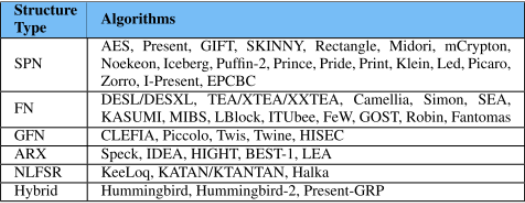

## Krótkie objaśnienie powyższych struktur:

1) **SPN** (**substitution–permutation network**) - **seria połączonych operacji matematycznych** stosowana w algorytmach szyfrów blokowych - pobierany jest blok tekstu jawnego i klucz jako dane wejściowe i stosowane jest **kilka naprzemiennych rund z wykorzystaniem** pól ‘podstawieniowych’ **(S-box)** i pól ‘przestawieniowych’ **(P-box)** w celu utworzenia bloku zaszyfrowanego tekstu (operacjami stosowanymi do ‘przestawiania danych’ są m.in. XOR oraz rotacja bitowa).

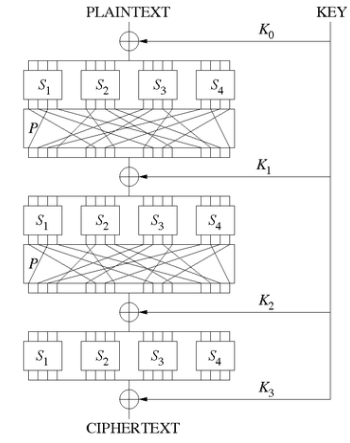

2) **FN** (**Feistel Networks**) - sieć Feistela **pozwala na szyfrowanie i deszyfrowanie informacji tym samym algorytmem**, mimo iż funkcja F nie jest odwracalna. **Tekst jawny dzieli się na dwa równe bloki $L_i$ oraz $R_i$** i stosuje dyfuzję w każdej rundzie tylko do jednej połowy. Dodatkowo, zamiana dwóch połówek następuje na początku każdej rundy.

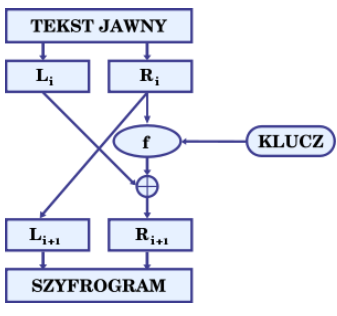

3) **GFN** (**Generalized Feistel Network**) - **zasada działania jest taka sama jak w przypadku zwykłej sieci Feistela**, różnica jest jeśli chodzi o podział tekstu jawnego. **W przypadku FN, blok jest dzielony na dwa n-bitowe podbloki**, a w **GFN k ≥ 2 n-bitowych podbloków i funkcję Feistel’a stosuje się do każdej pary podbloków**, po której następuje cykliczny przesunięcie proporcjonalne do liczby podbloków.

4) **ARX** (**add–rotate–XOR**) - algorytmy te opierają się tylko na **trzech operacjach**: (A) **dodawanie modułowe**, (R) **rotacje i rotacje z ustalonymi wartościami** oraz (X) **XOR**

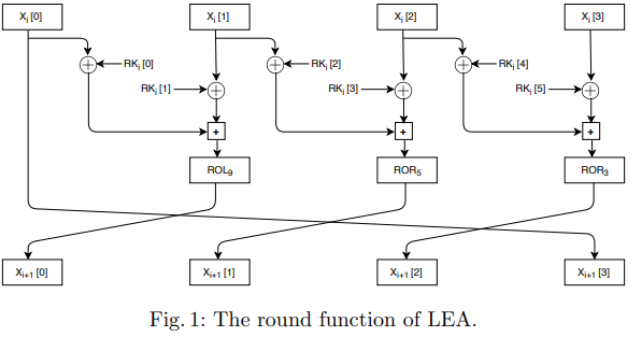

5) **NLFSR** (**nonlinear-feedback shift register**) - rejestr przesuwający z nieliniowym sprzężeniem zwrotnym - to rejestr przesuwny, którego **bit wejściowy jest funkcją nieliniową jego poprzedniego stanu**. Dla n-bitowego rejestru przesuwnego r jego następny stan jest zdefiniowany jako:

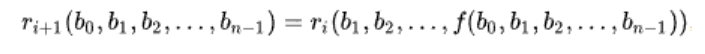

gdzie f jest nieliniową funkcją sprzężenia zwrotnego.

<center><img src='https://www.researchgate.net/profile/Elena-Dubrova/publication/285648708/figure/fig1/AS:613941470322731@1523386461908/The-structure-of-an-n-bit-Non-Linear-Feedback-Shift-Register.png' style='width:55%'></center>

6) **Hybrid** - łączy dowolne trzy typy (**SPN**, **FN**, **GFN**, **ARX**, **NLFSR**) lub nawet miesza bloki i właściwość strumienia w celu poprawy określonej charakterystyki (na przykład przepustowości, zużycia energii, GE, itp.) w oparciu o jego wymagania.
---

# Popularne algorytmy LWC oraz krótka charakterystyka:
---
## 1. Present
- Stworzony w **2007 r.** przez Orange Labs (Francja), Ruhr University Bochum (Niemcy) i Technical University of Denmark. 
- **Szyfr blokowy oparty o strukturę SPN**.
- Używa **64-bitowego bloku** na **dwóch wariantach klucza**: **80-bitów** lub **128-bitów**, z wymaganiami GE odpowiednio 1570 i 1886.
- **Liczba rund wynosi 31**. 
- Minimalne wymagania GE odnotowane dla tego algorytmu wynoszą ok. **1000 GE** (tylko szyfrowanie), **optymalne 2520-3010**. Warstwa nieliniowa oparta jest na pojedynczym **4-bitowym S-boksie**, który został **zaprojektowany z myślą o optymalizacji sprzętu**.
- Jeden z najbardziej **wydajnych sprzętowo i programowo** oraz będący zatwierdzonym przez ISO/IEC(29192-2P:2012). Wyróżnia się również **niewielkim rozmiarem** (około 2,5 razy mniejszy niż AES). **Present** jest przeznaczony do stosowania w sytuacjach, w których pożądane jest **niskie zużycie energii i wysoka wydajność chipa**.
- Implementacja Python: 
    - https://github.com/inmcm/present_cipher.


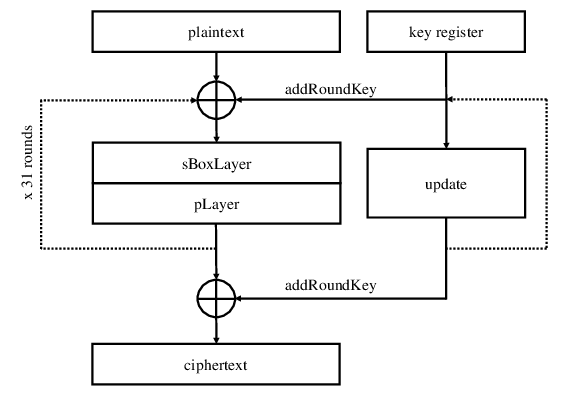

--------
## 2. TEA (Tiny Encryption Algorithm)
- Po raz pierwszy zaprezentowany na warsztatach Fast Software Encryption w Leuven w **1994** r.
- Algorytm należy do struktury **sieci Feistela**.
- **Obsługuje 128-bitowy klucz na 64-bitowym wejściu**, na danych wykonuje **32 rundy**.
- Wymagania to **GE 3872**.
- Algorytm w tej wersji ma **niezwykle proste planowanie kluczami**, mieszając wszystkie kluczowe materiały w dokładnie taki sam sposób dla każdego cyklu, **przez co jest bardzo podatny na ataki typu brute force**.
- Kolejnym **ograniczeniem struktury TEA** jest sprawa, że **każdy klucz jest równoważny trzem pozostałym**, co oznacza, że **efektywny rozmiar klucza wynosi tylko 126 bitów**, co czyni go podatnym na ataki.
- **Ulepszona wersja TEA to XTEA**, która używa **tego samego rozmiaru klucza i bloku, ale z większą liczbą iteracji (64 rundy)**, wykorzystując 3490 GE. Oferuje bardziej złożone planowanie kluczy z niewielkimi zmianami w Shift, XOR i funkcjach dodawania. XTEA został dodatkowo zmodyfikowany za pomocą XXTEA, aby uodpornić się na atak “related-key rectangle” (zmieniono ilość rund na 36).
- TEA, tak jak każdy z algorytmów LWC  jest **odpowiedni dla urządzeń małych, z małą wydajnością** oraz tanich.
- Implementacje Python:
    - https://stackoverflow.com/questions/2588364/python-tea-implementation.
    - https://gist.github.com/twheys/4e83567942172f8ba85058fae6bfeef5 .


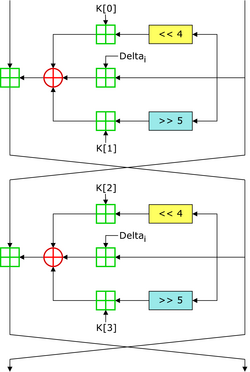

------
## 3. Picollo
- Należy do grupy **Generalized Feistel Network**.
- Działa na **64-bitowych blokach** i **dwóch długościach kluczy: 80 lub 128 bitowych**. Wykonuje na nich **dwie iteracje**.
- Najmniejsze wdrożenie algorytmu (**klucz 80-bitowy**) wymaga **432 GE** i dodatkowych **60 GE**, aby przeprowadzić deszyfrowanie
- **Ultralekki algorytm kryptograficzny** odpowiedni dla **ekstremalnie ograniczonych pod względem zasobów urządzeń** (**RFID**, **czujniki itp.**).
- Implementacja Python:
    - https://github.com/adipokala/piccolo-cipher 

<center><img src='https://www.researchgate.net/publication/325074448/figure/fig2/AS:625063946637316@1526038266997/The-encryption-process-of-Piccolo.png' style="width:36%"></center>

-------
## 4. KATAN/KTANTAN 
- Należy do grupy **NLFSR (nonlinear-feedback shift register)**.
- Inspirowany innym algorytmem - **KeeLoq**.
- Stosuje **klucz 80-bitowy w różnych rozmiarach bloków (32-bitowy, 48-bitowy lub 64-bitowy) przez 254 iteracje**. 
- Ma **bardzo proste planowanie kluczy w porównaniu do KeeLoq** - nie posiada operacji generowania klucza (w celu zmniejszenia wymagań GE).
- **Klucz od zainicjowania pozostaje niezmieniony aż do końca, w związku z tym używanie tego algorytmu jest ograniczone**.
- **Stosowany na małych urządzeniach** (KATAN - **802 GE** i KTANTAN - **462 GE**), jest przeznaczony głównie do **czujników sieci i RFID’s tagów**. 
- Implementacja Python:
    - https://github.com/bozhu/KATAN-Python 

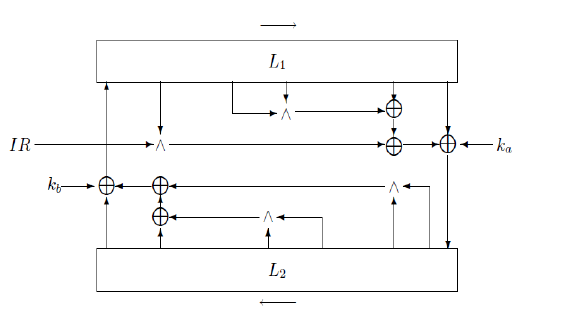

----------
## 5. Hummingbird-2 
- Oparty na **strukturze hybrydowej**.
- **Przeznaczony dla mikrokontrolerów z niższej półki**.
- Przyjmuje **64 bity na wejściu** (wektor początkowy) **ze 128-bitowym kluczem**. Działa dobrze na obu platformach (sprzęt/oprogramowanie).
- **Lepsza wydajność w porównaniu do algorytmu Present** (na 4-bitowych mikrokontrolerach).
- Wady: 
    - **Inicjalizacja jest konieczna przed zarówno szyfrowaniem, jak i deszyfrowaniem, ze względu na jego właściwość strumienia**.
    - **Różne funkcje szyfrowania i deszyfrowania**, dzięki temu pełna wersja jest o 70% cięższa niż        samo szyfrowanie.
    - Jego **wydajność spada** podczas przetwarzania **małych wiadomości**.
- Implementacja Python:
    - https://github.com/bozhu/Hummingbird2-Python

<center><img src='https://www.researchgate.net/publication/224262483/figure/fig1/AS:401933455118336@1472839811720/Hummingbird-encryption-2.png' style="width:45%"></center>

---
## Tabela wydajności poszczególnych algorytmów:

| Mode                                                 | Block Size (Bits) | Key Size (Bits) | Cycle | Area (GΕ) | Frequency (MHz) | Throughput (Mbps) | Technology (μm) |
|------------------------------------------------------|-------------------|-----------------|-------|-----------|-----------------|-------------------|-----------------|
| Serialized Implementation (Area Optimization)        |
| PRESENT                                              | enc               | 64              | 80    | 547       | 1075            | 0.1               | 0.0117          | 0.18 |
| PRESENT                                              | enc               | 64              | 128   | 559       | 1391            | 0.1               | 0.0115          | 0.18 |
| CLEFIA                                               | enc               | 128             | 128   | 176       | 2893            | 67                | 49              | 0.13 |
| CLEFIA                                               | enc/dec           | 128             | 128   | 176       | 2996            | 61                | 44              | 0.13 |
| AES                                                  | enc               | 128             | 128   | 177       | 3100            | 152               | 110             | 0.13 |
| AES                                                  | enc/dec           | 128             | 128   | 1032      | 3400            | 80                | 10              | 0.35 |
| Round-Based Implementation (Efficiency Optimization) |
| PRESENT                                              | enc               | 64              | 80    | 32        | 1570            | 0.1               | 0.20            | 0.18 |
| PRESENT                                              | enc               | 64              | 128   | 32        | 1884            | 0.1               | 0.20            | 0.18 |
| CLEFIA                                               | enc/dec           | 128             | 128   | 36        | 4950            | 201.3             | 715.69          | 0.09 |
| CLEFIA                                               | enc/dec           | 128             | 128   | 18        | 5979            | 225.8             | 1605.94         | 0.09 |
| AES                                                  | enc/dec           | 128             | 128   | 11        | 12,454          | 145.4             | 1691.35         | 0.13 |
| AES                                                  | enc/dec           | 128             | 128   | 54        | 5398            | 131.2             | 311.09          | 0.13 |


# Własne implementacje algorytmów w języku Python:
----
## Funkcja do zwracania wartości binarnej:

In [67]:
def get_bin(number: int, n: int)-> str:
    '''funkcja zwraca stringa binarnego dopełnionego do długości n'''
    return bin(number)[2:].zfill(n)

get_bin(1,5)

'00001'

## Funkcja do losowania ciągu bitów o zadanej długości:

In [68]:
import random

def get_random_bits(n: int) -> str:
    '''
    Funkcja przyjmuje:
    - długość w bitach
    Funkcja zwraca:
    - wylosowany losowy ciąg bitów o zadanej długości
    '''
    i = random.randint(0,pow(2,n)-1)
    bin_key = get_bin(i,n)
    return bin_key

test_key = get_random_bits(4)
print("Random 4 bits: " + test_key)
test_key = get_random_bits(8)
print("Random 8 bits: " +test_key)

Random 4 bits: 1101
Random 8 bits: 11100110



# 1. LEA (Lightweight Encryption Algorithm)
----------
### Informacje ogólne:
- algorytm stworzony w **2013 r.** w Korei Południowej. 
### Zastosowania:
- Szyfruje od **1.5, do 2 razy szybciej niż AES**, przez co stosuje się go w środowiskach, takich jak ‘**Big Data**’ oraz **przetwarzanie w chmurze**, a także **w lekkich środowiskach, takich jak urządzenia IoT i urządzenia mobilne**. 
### Specyfikacja:
- Opartym o strukturę **add–rotate–XOR**. 
- Szyfr zorientowany programowo (**software-oriented cipher** - nastawiony na bycie mało wymagającym, jeśli chodzi o zasoby/wydajność).
- Przetwarza **128-bitowe dane wejściowe**.
- Wykonuje **24, 28 albo 32 rundy** przy użyciu **kluczy o długości: 128, 192 lub 256 bitów**.
- LEA jest najczęściej używanym szyfrem blokowym w różnych środowiskach oprogramowania.
- Najbardziej kompaktowa wersja tego algorytmu wymaga **3826 GE** dla 76,19 Mb/s przepustowość.
### Bezpieczeństwo:
- Na rok 2019 nie jest znany żaden udany atak na pełnookresową LEA. Najlepiej opublikowanymi atakami na LEA w standardowym modelu ataku (CPA/CCA z nieznanym kluczem) są ataki typu **bumerang** i **różnicowe ataki liniowe**. 

## Schemat szyfrowania:

<img src='https://upload.wikimedia.org/wikipedia/commons/3/3a/LEA_enc_round_function.png' style='width:55%'>

---
# Implementacja LEA (128-bit)
---
## Operacja dodawania ADD (modulo 2<sup>32</sup>):

In [69]:
def ADD(x: str,y: str) -> str:
    '''Operacja dodawania modulo 2^32'''
    return get_bin(((int(x,2) + int(y,2)) % 4294967296), 32) #pow(2,32)

ADD('11111111111111111111111111111111','10')

'00000000000000000000000000000001'

---
## Operacja odejmowania SUB (modulo 2<sup>32</sup>):

In [70]:
def SUB(x: str,y: str) -> str:
    '''Operacja odejmowania modulo 2^32'''
    return get_bin(((int(x,2) - int(y,2)) % 4294967296),32)

SUB('1','10')

'11111111111111111111111111111111'

---
## Operacja XOR:

In [71]:
def XOR(bits1: str, bits2: str) -> str:
    """Operacja XOR"""
    xor_result = ""
    for index in range(len(bits1)):
        if bits1[index] == bits2[index]: 
            xor_result += '0'
        else:
            xor_result += '1'
    return xor_result 

XOR('010','110')

'100'

---
## Operacja ROTATE (LEFT & RIGHT):

In [7]:
def ROL(x: str,i: str) -> str:
    '''i-bitowa rotacja w lewo'''
    shiftedbits = x[i:] + x[:i]
    return shiftedbits

def ROR(x: str,i: str) -> str:
    '''i-bitowa rotacja w prawo'''
    shiftedbits = x[-i:] + x[:-i] 
    return shiftedbits

print(ROL('10010',1))
print(ROR('10010',1))

00101
01001


---
## Tablica stałych $\delta$: 
### Ciekawostka :
Wartości w niej umieszczone otrzymuje się z szesnastkowego wyrażenia $\sqrt(766995)$, gdzie 76, 69 i 95 to kody ASCII **„L”**, **„E”** i **„A”**.

In [72]:
#tablica jest dłuższa niż potrzebujemy, bo wszystkie wartości wykorzystujemy przy dłuższych kluczach
d = [0xc3efe9db, 0x44626b02, 0x79e27c8a, 0x78df30ec, 0x715ea49e, 0xc785da0a, 0xe04ef22a, 0xe5c40957]

get_bin(d[0],32)

'11000011111011111110100111011011'

---
## Funkcja generująca klucze rundy (128-bit): 
${\displaystyle K=K[0]\|K[1]\|K[2]\|K[3]}$ to 128-bitowy klucz, gdzie ${\displaystyle K[i]} ({\displaystyle 0\leq i<4})$ to 32-bitowe bloki. Funkcja generująca klucze rundy dla 128-bitowej wersji LEA przyjmuje ${\displaystyle K}$ oraz **cztery 32-bitowe stałe** ${\displaystyle \delta [i]}({\displaystyle 0\leq i<4})$ i zwraca **dwadzieścia cztery 192-bitowe klucze rund** ${\displaystyle RK_{i}} ({\displaystyle 0\leq i<24}$). Operacja generowania kluczy rundowych dla LEA-128 wygląda następująco:

1. ${\displaystyle T[0]\|T[1]\|T[2]\|T[3]\leftarrow K[0]\|K[1]\|K[2]\|K[3]}$
2. for ${\displaystyle i=0}$ to ${\displaystyle 23}$:<br>
    - ${\displaystyle T[0]\leftarrow \left(T[0]\boxplus \left(\delta [i\mod 4]\lll i\right)\right)\lll 1}$ <br>
    - ${\displaystyle T[1]\leftarrow \left(T[1]\boxplus \left(\delta [i\mod 4]\lll \left(i+1\right)\right)\right)\lll 3}$<br>
    - ${\displaystyle T[2]\leftarrow \left(T[2]\boxplus \left(\delta [i\mod 4]\lll \left(i+2\right)\right)\right)\lll 6}$<br>
    - ${\displaystyle T[3]\leftarrow \left(T[3]\boxplus \left(\delta [i\mod 4]\lll \left(i+3\right)\right)\right)\lll 11}$<br>
    - ${\displaystyle RK_{i}\leftarrow T[0]\|T[1]\|T[2]\|T[1]\|T[3]\|T[1]}$

In [73]:
from textwrap import wrap

def get_round_keys(key: str) -> list:
    '''
    Funkcja przyjmuje:
    - 128-bitowy klucz (string w postaci binarnej)
    Funkcja zwraca:
    - 24 192-bitowe klucze rundowe (lista z sześcioma 32-bitowymi stringami w postaci binarnej) w tablicy
    '''
    # tabela z kluczami rund
    RK = []
    
    # 1.
    T0, T1, T2, T3 = wrap(key, 32)
    
    
    # 2.
    for i in range(0,24):
        delta = get_bin(d[i%4], 32)
        
        T0 = ROL(ADD(T0, ROL(delta,i)), 1)
        T1 = ROL(ADD(T1, ROL(delta,i+1)), 3)
        T2 = ROL(ADD(T2, ROL(delta,i+2)), 6)
        T3 = ROL(ADD(T3, ROL(delta,i+3)), 11)
        
        RK.append([T0, T1, T2, T1, T3, T1])
    return RK
    
test_key = get_random_bits(128)
test_RK = get_round_keys(test_key)
print(len(test_RK))

24


---
## Szyfrowanie:
${\displaystyle P=P[0]\|P[1]\|P[2]\|P[3]}$ to **128-bitowy tekst**, ${\displaystyle C=C[0]\|C[1]\|C[2]\|C[3]}$ to **128-bitowy szyfrogram**, gdzie ${\displaystyle P[i]}$ oraz ${\displaystyle C[i]}$ (${\displaystyle 0\leq i<4}$) to **32-bitowe** bloki. ${\displaystyle RK_{i}=RK_{i}[0]\|RK_{i}[1]\|RK_{i}[2]\|K_{i}[3]\|RK_{i}[4]\|RK_{i}[5]}$ (${\displaystyle 0\leq i<Nr}$) to **192-bitowe klucze rund**, gdzie ${\displaystyle RK_{i}[j]}$ (${\displaystyle 0\leq j<6}$) to 32-bitowe bloki. ${\displaystyle Nr}$ to liczba rund zależna od długości klucza LEA algorithm. Operacja szyfrowania przebiega jak poniżej:
1. ${\displaystyle X_{0}[0]\|X_{0}[1]\|X_{0}[2]\|X_{0}[3]\leftarrow P[0]\|P[1]\|P[2]\|P[3]}$
2. for ${\displaystyle i=0}$ to ${\displaystyle Nr-1}$: <br>
    - ${\displaystyle X_{i+1}[0]\leftarrow \left(\left(X_{i}[0]\oplus RK_{i}[0]\right)\boxplus \left(X_{i}[1]\oplus RK_{i}[1]\right)\right)\lll 9}$
    - ${\displaystyle X_{i+1}[1]\leftarrow \left(\left(X_{i}[1]\oplus RK_{i}[2]\right)\boxplus \left(X_{i}[2]\oplus RK_{i}[3]\right)\right)\ggg 5}$
    - ${\displaystyle X_{i+1}[2]\leftarrow \left(\left(X_{i}[2]\oplus RK_{i}[4]\right)\boxplus \left(X_{i}[3]\oplus RK_{i}[5]\right)\right)\ggg 3}$
    - ${\displaystyle X_{i+1}[3]\leftarrow X_{i}[0]}$
3. ${\displaystyle C[0]\|C[1]\|C[2]\|C[3]\leftarrow X_{Nr}[0]\|X_{Nr}[1]\|X_{Nr}[2]\|X_{Nr}[3]}$

In [74]:
def lea_encrypt(block: str, key: str) -> str:
    '''
    Funkcja przyjmuje:
    - 128-bitowy blok (string w postaci binarnej)
    - 128-bitowy klucz (string w postaci binarnej)
    Funkcja zwraca:
    - 128-bitowy zaszyfrowany blok (string w postaci binarnej)
    '''
    # wygenerowanie kluczy rundowych
    RK = get_round_keys(key)
    
    # 1.
    X00, X01, X02, X03 = wrap(block, 32)
    
    
    # 2.
    for i in range(0,24):
        X10 = ROL(ADD(XOR(X00, RK[i][0]), XOR(X01, RK[i][1])), 9)
        X11 = ROR(ADD(XOR(X01, RK[i][2]), XOR(X02, RK[i][3])), 5)
        X12 = ROR(ADD(XOR(X02, RK[i][4]), XOR(X03, RK[i][5])), 3)
        X13 = X00
        
        X00, X01, X02, X03 = X10, X11, X12, X13
        
    # 3.
    return X10+X11+X12+X13

---
## Deszyfrowanie:
Deszyfrowanie jest po prostu odwrotnością szyfrowania i przebiega jak poniżej:
1. ${\displaystyle X_{Nr}[0]\|X_{Nr}[1]\|X_{Nr}[2]\|X_{Nr}[3]\leftarrow C[0]\|C[1]\|C[2]\|C[3]}$
2. for ${\displaystyle i=(Nr-1)}$ down to ${\displaystyle 0}$ <br>
    - ${\displaystyle X_{i}[0]\leftarrow X_{i+1}[3]}$
    
    - ${\displaystyle X_{i}[1]\leftarrow \left(\left(X_{i+1}[0]\ggg 9\right)\boxminus \left(X_{i}[0]\oplus RK_{i}[0]\right)\right)\oplus RK_{i}[1]}$

    - ${\displaystyle X_{i}[2]\leftarrow \left(\left(X_{i+1}[1]\lll 5\right)\boxminus \left(X_{i}[1]\oplus RK_{i}[2]\right)\right)\oplus RK_{i}[3]}$
    
    - ${\displaystyle X_{i}[3]\leftarrow \left(\left(X_{i+1}[2]\lll 3\right)\boxminus \left(X_{i}[2]\oplus RK_{i}[4]\right)\right)\oplus RK_{i}[5]}$
    
3. ${\displaystyle P[0]\|P[1]\|P[2]\|P[3]\leftarrow X_{0}[0]\|X_{0}[1]\|X_{0}[2]\|X_{0}[3]}$

In [75]:
def lea_decrypt(ciphered_block: str, key: str) -> str:
    '''
    Funkcja przyjmuje:
    - 128-bitowy zaszyfrowany blok (string w postaci binarnej)
    - 128-bitowy klucz (string w postaci binarnej)
    Funkcja zwraca:
    - 128-bitowy odszyfrowany blok (string w postaci binarnej)
    '''
    # wygenerowanie kluczy rundowych
    RK = get_round_keys(key)
    
    # 1.
    X10, X11, X12, X13 = wrap(ciphered_block, 32)
    
    # 2.
    for i in range(23,-1,-1):
        X00 = X13
        X01 = XOR(SUB(ROR(X10, 9), XOR(X00, RK[i][0])), RK[i][1])
        X02 = XOR(SUB(ROL(X11, 5), XOR(X01, RK[i][2])), RK[i][3])
        X03 = XOR(SUB(ROL(X12, 3), XOR(X02, RK[i][4])), RK[i][5])
        
        X10, X11, X12, X13 = X00, X01, X02, X03 
        
    # 3.
    return X00+X01+X02+X03

---
## Test dla losowych wartości:

In [84]:
key = get_random_bits(128)
plaintext = get_random_bits(128)

print('Plaintext: '+ hex(int(plaintext,2)))
ciphertext = lea_encrypt(plaintext, key)
print('Ciphered: '+hex(int(ciphertext,2)))
decrypted = lea_decrypt(ciphertext, key)
print('Decrypted: '+hex(int(decrypted,2)))
print('if plain==decrypted:'+ str(plaintext==decrypted))

Plaintext: 0xbf8cfe6a5cd4b67837309eced25f232e
Ciphered: 0x61eb10f1bc3dc0437e2991d97e0e37b6
Decrypted: 0xbf8cfe6a5cd4b67837309eced25f232e
if plain==decrypted:True


---
## Wektory testowe:

In [80]:
'''
LEA-128
# Key: 0f 1e 2d 3c 4b 5a 69 78 87 96 a5 b4 c3 d2 e1 f0
# Plaintext: 10 11 12 13 14 15 16 17 18 19 1a 1b 1c 1d 1e 1f
# Ciphertext: 9f c8 4e 35 28 c6 c6 18 55 32 c7 a7 04 64 8b fd
'''

key = get_bin(0x0f1e2d3c4b5a69788796a5b4c3d2e1f0, 128) 
plaintext = get_bin(0x101112131415161718191a1b1c1d1e1f, 128)

print('Plaintext: '+ hex(int(plaintext,2)))
ciphertext = lea_encrypt(plaintext, key)
print('Ciphertext: '+hex(int(ciphertext,2)))
print('if ciphertext==0x9fc84e3528c6c6185532c7a704648bfd:'+ str(int(ciphertext,2)==0x9fc84e3528c6c6185532c7a704648bfd))
decrypted = lea_decrypt(ciphertext, key)
print('Decrypted: '+hex(int(decrypted,2)))

Plaintext: 0x101112131415161718191a1b1c1d1e1f
Ciphertext: 0xaba3d37ecdcb95e4c924be72cbfc48ab
if ciphertext==0x9fc84e3528c6c6185532c7a704648bfd:False
Decrypted: 0x101112131415161718191a1b1c1d1e1f


# 2. KeeLoq
----------
### Informacje ogólne:
- Jego sprzętowa implementacja została zrealizowana przez Willema Smita, doktora z firmy Nanoteq Pty Ltd (Południowa Afryka) w połowie lat 80., a następnie została sprzedana firmie Microchip Technology Inc w 1995 roku za 10 milionów dolarów.
### Zastosowania:
- Jest lub był używany w wielu bezkluczowych systemach wprowadzania hasła przez takie firmy jak **Chrysler**, **Daewoo**, **Fiat**, **GM**, **Honda**, **Toyota**, **Volvo**, **Volkswagen Group**, **Clifford**, **Shurlok**, **Jaguar**. 
### Specyfikacja:
- **32-bitowy blok**.  
- **64-bitowy klucz**.  
- Wykonuje **528 rund**.
### Bezpieczeństwo:
- Podatny na tzw. **„przechwytywacze kluczy”** KeyLoq, które były/są bardzo popularne wśród złodziei samochodów.
- Podatny na ataki urządzeń programowalnych FPGA w celu złamania kluczy opartych na KeyLoq, na co były potrzebne **dwa tygodnie** dzięki zredukowaniu długości klucza w rzeczywistych implementacjach sprzętowych szyfru.
- Podatny na **ataki kanałem bocznym**.

# Implementacja KeeLoq: 
---
## Funkcja NLF:

In [14]:
NLF_LOOKUP_CONSTANT = 0x3a5c742e

def NLF(d):
    return (NLF_LOOKUP_CONSTANT >> d) & 1

## Szyfrowanie:

<img src='https://upload.wikimedia.org/wikipedia/commons/6/6c/%D0%9A%D0%BE%D0%B4%D0%B8%D1%80%D0%BE%D0%B2%D0%BA%D0%B0.png' style='width:40%'>

In [15]:
def keeloq_encrypt(plaintext: int, key:int) -> int:
    '''
    Funkcja przyjmuje:
    - 32-bitowy blok
    - 64-bitowy klucz
    Funkcja zwraca:
    - 32-bitowy zaszyfrowany blok
    '''
    ciphertext = plaintext
    for i in range(528):
        # Calculate NLF_input
        nlf_input = ((ciphertext >> 31) & 1) << 4 | ((ciphertext >> 26) & 1) << 3 | ((ciphertext >> 20) & 1) << 2 | ((ciphertext >> 9) & 1) << 1 | (ciphertext >> 1) & 1
        
        # Calculate NLF_output
        out = NLF(nlf_input)
        
        # Calculate XOR
        xor = key & 1 ^ (ciphertext >> 16) & 1 ^ (ciphertext & 1) ^ out
        
        # Rotate key right
        key = (key & 1) << 63 | key >> 1
            
        # Final concatenation
        ciphertext = (ciphertext >> 1) | (xor << 31)
    return ciphertext

---
## Deszyfrowanie:

<img src='https://www.researchgate.net/publication/220337111/figure/fig1/AS:305506850754560@1449849917023/Structure-of-the-KeeLoq-decryption-cipher-taken-from-9.png' style='width:40%'>

In [16]:
def keeloq_decrypt(ciphertext: int, key: int) -> int:
    '''
    Funkcja przyjmuje:
    - 32-bitowy zaszyfrowany blok
    - 64-bitowy klucz
    Funkcja zwraca:
    - 32-bitowy zdeszyfrowany blok
    '''
    for i in range(528):
        # Calculate NLF_input
        nlf_input = ((ciphertext >> 30) & 1) << 4 | ((ciphertext >> 25) & 1) << 3 | ((ciphertext >> 19) & 1) << 2 | ((ciphertext >> 8) & 1) << 1 | ciphertext & 1

        # Calculate NLF_output
        out = NLF(nlf_input)
        
        # Calculate XOR
        xor = (ciphertext >> 31) ^ (ciphertext >> 15 & 1) ^ out ^ (key >> 15 & 1)
    
        # Rotate key left
        key = (key & 0x7FFFFFFFFFFFFFFF) << 1 | key >> 63
        
        # Final concatenation
        ciphertext = (ciphertext & 0x7FFFFFFF) << 1 | xor

    return ciphertext

---
## Test dla losowych wartości:

In [61]:
key = int(get_random_bits(64),2)
plaintext = int(get_random_bits(32),2)

print('Plaintext: '+ hex(plaintext))
ciphertext = keeloq_encrypt(plaintext, key)
print('Ciphered: '+hex(ciphertext))
decrypted = keeloq_decrypt(ciphertext, key)
print('Decrypted: '+hex(decrypted))
print('if plaintext==decrypted:'+ str(plaintext==decrypted))


Plaintext: 0x7240cc3e
Ciphered: 0xfb61e7f1
Decrypted: 0x7240cc3e
if plaintext==decrypted:True


---
## Wektory testowe:

In [66]:
"""
key                | plaintext  | ciphertext 
0x5cec6701b79fd949 | 0xf741e2db | 0xe44f4cdf
0x5cec6701b79fd949 | 0x0ca69b92 | 0xa6ac0ea2
"""
key = 0x5cec6701b79fd949
plaintext = 0xf741e2db

print('Plaintext: '+ hex(plaintext))
ciphertext = keeloq_encrypt(plaintext, key)
print('Ciphered: '+hex(ciphertext))
decrypted = keeloq_decrypt(ciphertext, key)
print('Decrypted: '+hex(decrypted))
print('if plaintext==decrypted:'+ str(plaintext==decrypted))

Plaintext: 0xf741e2db
Ciphered: 0xe44f4cdf
Decrypted: 0xf741e2db
if plaintext==decrypted:True


# Źródła:
- https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=9328432
- https://en.wikipedia.org/wiki/Main_Page
- https://www.researchgate.net/ 
- https://docplayer.net/10603041-Lea-a-128-bit-block-cipher-for-fast-encryption-on-common-processors.html
- https://www.sciencedirect.com/topics/computer-science/lightweight-cryptography